# Построение математической модели

## Состав команды

* Казакова Екатерина
* Корчагин Павел
* Поддубная Мария
* Светлаков Алексей

## Исследуемая система

Космическое тело (астероид), осуществляющее движение под действиями сил, создаваемых иными космическими телами: Солнце и Планета.

## Цели и результаты моделирования

Целью построения данной модели является расчет траектории движения астеройда.
Предполагается получение следующих результатов по итогам моделирования:


1.   Таблица зависимости координат астеройда в двухмерном пространстве от времени (t,x,y) с погрешностью 10^(-4); 
2.   Визуализация траекторий движения космических тел, задействованных в модели.



## Структура модели

Структура модели должна содержать следующие физические компоненты:


*   Солнце;
*   Планета;
*   Астероид;
*   Пространство (Координатная сетка).

Структура модели представлена на рисунке ниже



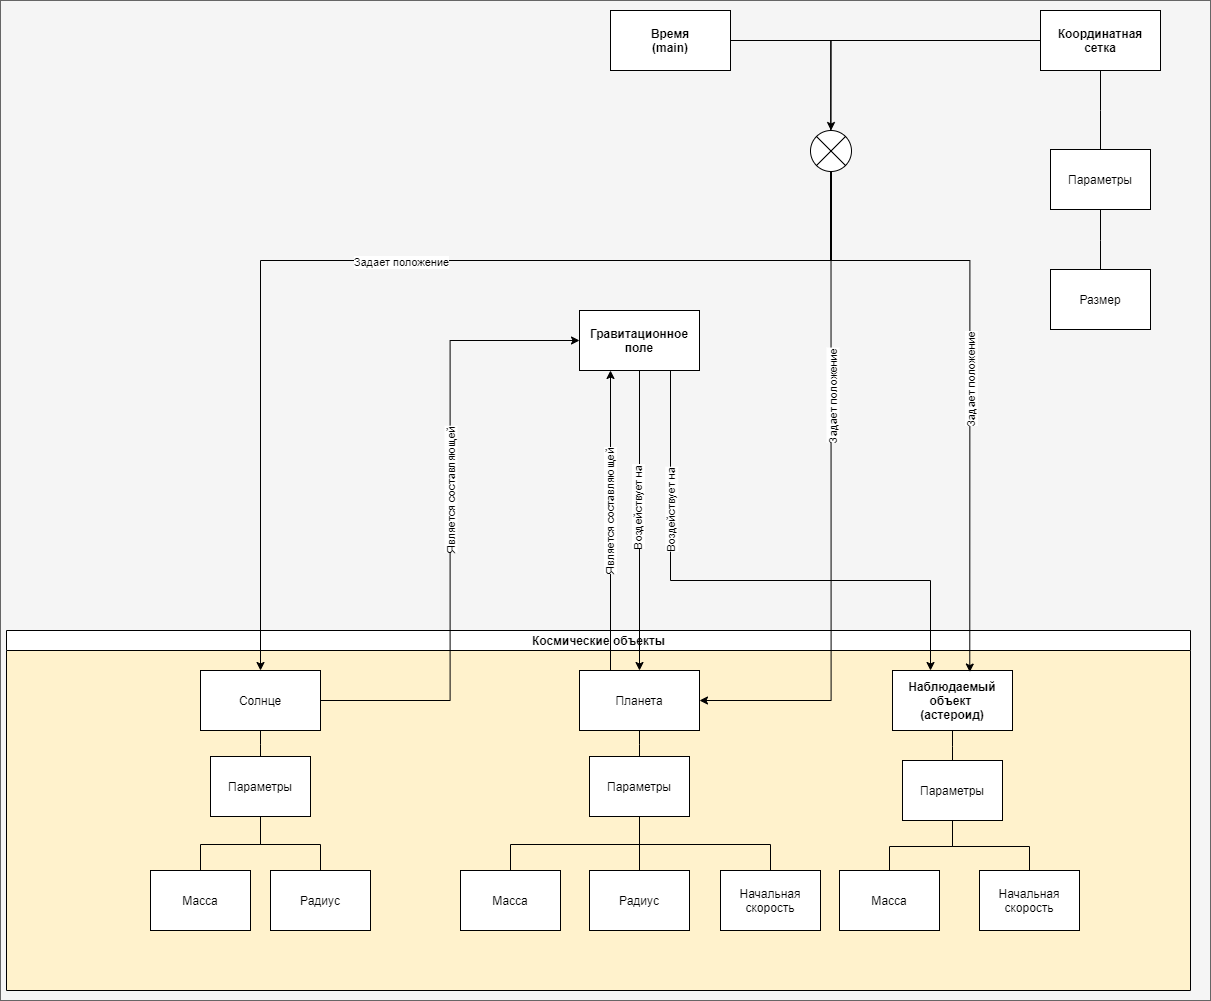

## Исходные данные

Система: гелеоцентрическая

Сетка: ([-400 млн. км; 400 млн. км];[300 млн. км; 300 млн. км])

Параметры Солнца:

*   Масса: M= 1,9885⋅10^30 кг
*   Радиус: R= 6,955 * 10^5 км

Параметры Планеты:

*   Масса: Mp= 6,4171 * 10^23 кг
*   Радиус: Rp= 3389 км
*   Вектор начальной скорости: Vp= (24;0) км/с
*   Координыты начального положения: XYp=(0; 206 млн. км)

Параметры Астеройда:

*   Масса: Ma= 3 х 10^10 кг
*   Радиус: Ra= 0,1 км
*   Начальная скорость: Vа= (25; 0) км/с
*   Координыты начального положения: XYa= (20 млн. км; 130 млн. км)

На вход программы подается XML файл следующего вида:




```
<?xml version="1.0" encoding="utf-8"?>
<InputData>
  <Grid>
	<GridX>400</GridX>
	<GridY>300</GridY>
  </Grid>
  <Sun>
	<Weight>1988500000000000000000000000000</Weight>
	<Radius>695500</Radius>
  </Sun>
  <PlanetsList>
	<Planet>
	 <Weight>641710000000000000000000</Weight>
	 <Radius>3389</Radius>
	 <CoordinateX>0</CoordinateX>
	 <CoordinateY>206</CoordinateY>
	 <SpeedX>24</SpeedX>
	 <SpeedY>0</SpeedY>
	</Planet>
	<!-- Planet может быть несколько -->
  </PlanetsList>
  <Asteroid>
	<Weight>30000000000</Weight>
	<Radius>0,1</Radius>
	<CoordinateX>20</CoordinateX>
	<CoordinateY>130</CoordinateY>
	<SpeedX>25</SpeedX>
	<SpeedY>0</SpeedY>
  </Asteroid>
</InputData>
```



На входные данные накладываются следующие ограничения и допущения:

*   Солнце может быть только одно;
*   Планет может быть несколько (не больше 4);
*   Астероид может быть только один;
*   Пересечение планет друг с другом и с Солнцем не допускается;
*   Начальные координаты всех объектов не должны выходить на границу сетки - 10%;
*   Массы планет должны быть пренебрежимо малы в сравнении с массой Солнца;
*   Масса астеройда должна быть пренебрежимо мала в спавнении с массами плпнет и Солнца.





## Алгоритм модели

Введем следующие допущения:

*   Положение Солнца со временем не меняется, так как массы планет и астеройда пренебрежимо малы в сравнении с массой Солнца;
*   На планеты оказывают воздействие Солнце и другие планеты, так как масса астеройда пренебрежимо мала в сравнении с массами планет;
*   На астеройд оказывают воздействие каждая из планет и Солнце;
*   Все объекты - точечные источники гравитации, радиусы указаны для предотвращения пересечения тел.


Задача сводится к расчету координат каждого из космических тел (Планеты и астероид) в каждый момент времени по следующему алгоритму:


Берется цикл с шагом Δt от 0 до 1 года:

  1.	Берется цикл по всем планетам (i):

    1.1.	Вычисляет-ся вектор направления по модулю, равный силе, оказываемой на планету i Солнцем;

    1.2.	Берется цикл по всем планетам кроме i (j):

      1.2.1.	Вычисляется вектор направления по модулю, равный силе, 
  оказываемой на планету i планетой j;

    1.3.	Рассчитывает-ся суммарный вектор силы от воздействия Солнца и прочих планет на планету j;

    1.4.	По 2 закону Ньютона рассчитывается вектор ускорения планеты i;

    1.5.	На основе текущего положения планеты, вектора скорости и найденно-го вектора ускорения планеты i рассчитывается ее вектор скорости и положение на плоскости через Δt;

  2.	Вычисляет-ся вектор направления по модулю, равный силе, оказываемой на астеройд Солнцем;

  3.	Берется цикл по всем планетам (k):

    3.1.	Вычисляет-ся вектор направления по модулю, равный силе, оказываемой на астеройд планетой k;

  4.	Рассчитывает-ся суммарный вектор силы от воздействия Солнца и планет на астероид;

  5.	По 3 закону Ньютона рассчитывается вектор ускорения астероида;

  6.	На основе текущего положения, вектора скорости и найденного вектора ускорения астреройда рассчитывается его вектор скорости и положение на плоскости через Δt.






## Математические уравнения модели

Модуль силы гравитационного воздействия между телами определяется следующим уравнением:

$F=G\frac{m_1m_2}{r^2}$,

где:

$m_1, m_2$ - массы взаимодействующих тел

$r$ - расстояние между центрами масс взаимодействующих тел

$G=6.67*10^{-11} м^2*кг^{-1}*см^{-2}$ - гравитационная постоянная

Направление вектора силы гравитационного воздействия одного тела на друргугое коллиниарен $r$ и направлен к центру масс тела, оказывающего воздействие.



Расчет ускорения результирующей силы осуществляется по  2 закону Ньютона:

$\overrightarrow{a}=\frac{{\overrightarrow{F}}}{m}$,

где:

$m$ - масса тела

$\overrightarrow{F}$ - вектор результирующей силы

Расчет скорости через $Δt$ осуществляется по следующей формуле:

$\overrightarrow{v}=\overrightarrow{v_0}+\overrightarrow{a}Δt$


где:

$\overrightarrow{v_0}$ - вектор скорости в текущий мамент времени

Расчет кординат тела через $Δt$ осуществляется по следующим формулам:

$x = х_0 + v_{0х}Δt + а_х \frac{Δt^2}{2}$

$y = y_0 + v_{0y}Δt + а_y \frac{Δt^2}{2}$

где:

$v_{0х}, v_{0y}$ - прекции текущего вектора скорости

$a_{х}, a_{y}$ - прекции верктора ускорения

$х_0, y_0$ - координаты в текущий момент времени